In [ ]:
#In case you don't have qiskit, install it now
%pip install qiskit --quiet
%pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import random
import qiskit
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from IPython.core.interactiveshell import InteractiveShell
from IPython import display
InteractiveShell.ast_node_interactivity = 'all'

-----Welcome to Quantum Black Jack-----
The rules are simmilar to classical Black Jack: 
Your goal is to get the closest to 21 without exceeding the amount

In the quantum version, you will be shown several cards which all have 
a random starting state. You must use the tokens available to execute
operations that modify each card's state before measuring the circuit
A card's probability of being evaluated increases the closer the qubit
is to the |1> state. Once you have finished modifying your probability set of
your cards, you will measure against the dealer for who is the closest to 21
Keep in mind, the dealer is playing classical blackjack while you are
the one in the quantum world :)

Now that the rules are explained, are you ready to begin? (y/n): y
Select a difficulty (Easy/Hard): Easy
Enter the number of players: (1-2)1

Dealer hand  ['q', '☐']
------------------------------------------------


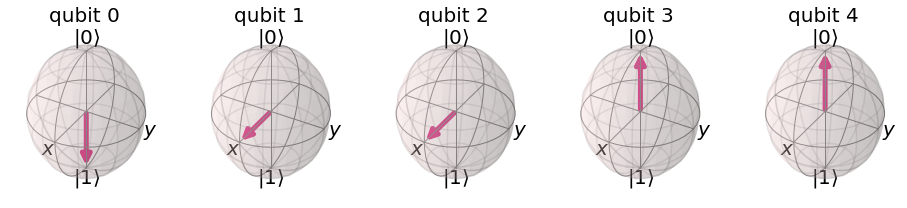

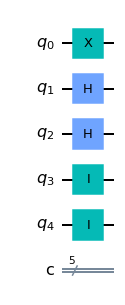

KEY_____________
M - 0 tokens
H - 6 tokens
X - 8 tokens
Y - 6 tokens
RY(pi/2) - 4 tokens
RZ(pi/2) - 4 tokens
RX(pi/2) - 4 tokens
CNOT - 6 tokens
SWAP - 10 tokens
Your hand:  ['10', 'k', '9', 'j', '3']
Your tokens:  20
Dont forget! Use the 'M' gate to measure the circuit!
Enter a move (H, X, Z, Y, SWAP, CNOT, M, RY, RZ, RX)X
Enter the card index to modify (0-4): 3
------------------------------------------------


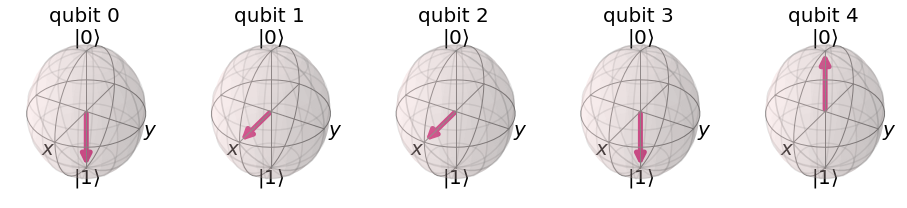

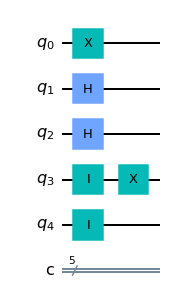

KEY_____________
M - 0 tokens
H - 6 tokens
X - 8 tokens
Y - 6 tokens
RY(pi/2) - 4 tokens
RZ(pi/2) - 4 tokens
RX(pi/2) - 4 tokens
CNOT - 6 tokens
SWAP - 10 tokens
Your hand:  ['10', 'k', '9', 'j', '3']
Your tokens:  12
Dont forget! Use the 'M' gate to measure the circuit!
Enter a move (H, X, Z, Y, SWAP, CNOT, M, RY, RZ, RX)H
Enter the card index to modify (0-4): 1
------------------------------------------------


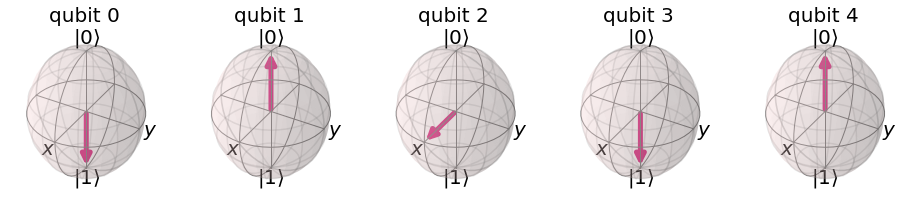

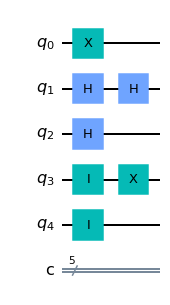

KEY_____________
M - 0 tokens
H - 6 tokens
X - 8 tokens
Y - 6 tokens
RY(pi/2) - 4 tokens
RZ(pi/2) - 4 tokens
RX(pi/2) - 4 tokens
CNOT - 6 tokens
SWAP - 10 tokens
Your hand:  ['10', 'k', '9', 'j', '3']
Your tokens:  6
Dont forget! Use the 'M' gate to measure the circuit!
Enter a move (H, X, Z, Y, SWAP, CNOT, M, RY, RZ, RX)H
Enter the card index to modify (0-4): 2
------------------------------------------------


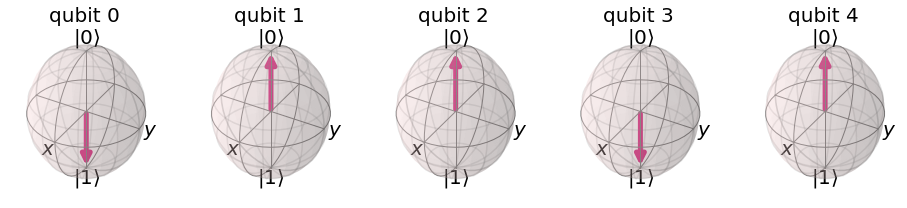

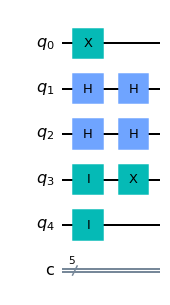

KEY_____________
M - 0 tokens
H - 6 tokens
X - 8 tokens
Y - 6 tokens
RY(pi/2) - 4 tokens
RZ(pi/2) - 4 tokens
RX(pi/2) - 4 tokens
CNOT - 6 tokens
SWAP - 10 tokens
Your hand:  ['10', 'k', '9', 'j', '3']
Your tokens:  0
Dont forget! Use the 'M' gate to measure the circuit!
Enter a move (H, X, Z, Y, SWAP, CNOT, M, RY, RZ, RX)M
MEASURING CIRCUIT! GOOD LUCK!


In [ ]:

#-----------------------------------------------------------------------------------------------------

#DEFINE CONSTANT
#number of cards
n = 5
#number of tokens to apply gates with
tokens = 20

#circuit
qc = QuantumCircuit(n,n)

#operations
single_ops = ['H','X','RY','RX','RZ','Z', 'Y']
multi_ops = ['CNOT', 'SWAP']

#cards and hand
card_list = ['2','3','4','5','6','7','8','9','10','j','q','k','A']

#token map
cost_table = {'H':6,'X':8,'Z':6,'M':0,'RY':4, 'RZ':4, 'RX':4, 'CNOT':6,'SWAP':10, 'Y':6}

#dealer output global variable
dealer_out = 'dealer\'s hand: '
#END DEFINE CONSTANT
#-----------------------------------------------------------------------------------------------------
#FUNCTIONS
#Applies cnot gate and swap gate
def run_double_operation(qc, index1, index2, move):
    if move == "CNOT":
      qc.cx(index1,index2)
    if move == "SWAP":
      qc.swap(index1,index2)


 #applies H gate, X gate, M token decrement, and qubit rotation
def run_single_operation(qc, index, move):
    if move == "H":
      qc.h(index)
    if move == "X":
      qc.x(index)
    if move == "Z":
      qc.z(index)
    if move == "RY":
      qc.ry(np.pi/2,index)
    if move == "RX":
      qc.rx(np.pi/2,index)
    if move == "RZ":
      qc.rz(np.pi/2,index)
    if move == 'Y':
      qc.y(index)

def print_states(qc):
  qc.draw('mpl')

#randomly adds n cards to the players hand
def create_hand():
    hand = []
    for i in range(n):
        hand.append(random.choice(card_list))
    return hand
    print(hand)

#generates a random starting state for the cards in hard mode
def randomize_state_normal(qc, n):
    for i in range(n):
        theta = random.uniform(0.0, 2*np.pi)
        phi = random.uniform(0.0, 2*np.pi)
        lamb = random.uniform(0.0, 2*np.pi)
        qc.u(theta, phi, lamb, i)

#generates a random starting state for the cards in easy mode
def randomize_state_easy(qc, n):
    for i in range(n):
        r = random.randint(0,2)
        if r == 0:
            qc.i(i)
        elif r == 1:
            qc.x(i)
        else:
            qc.h(i)

def game_rules():
    print("-----Welcome to Quantum Black Jack-----")
    print("The rules are simmilar to classical Black Jack: ")
    print("Your goal is to get the closest to 21 without exceeding the amount")
    print()
    print("In the quantum version, you will be shown several cards which all have ")
    print("a random starting state. You must use the tokens available to execute")
    print("operations that modify each card's state before measuring the circuit")
    print("A card's probability of being evaluated increases the closer the qubit")
    print("is to the |1> state. Once you have finished modifying your probability set of")
    print("your cards, you will measure against the dealer for who is the closest to 21")
    print("Keep in mind, the dealer is playing classical blackjack while you are")
    print("the one in the quantum world :)")
    print()

def init_dealer_hand():
    deal_num = 2
    hand = []
    for i in range(deal_num-1):
        hand.append(random.choice(card_list))
    hand.append('☐')
    return hand

def compute_hand(hand, bitstr):
    face_card_values = {'A':11,'j':10,'q':10,'k':10}
    non_face_vals = ['2','3','4','5','6','7','8','9','10']
    sum = 0
    ace_exists = False
    for i in range(len(hand)):
      if(bitstr[i]=='1'):
        if hand[i] in non_face_vals:
          sum += eval(hand[i])
        else:
          sum += face_card_values[hand[i]]
          if hand[i] == 'A':
            ace_exists = True

    if ace_exists and sum > 21:
      sum -= 10
    return sum

def compute_dealer():
  global dealer_out
  global dealer_hand
  dealer_hand.pop()
  bitstr = []
  bitstr = ['1']
  val = compute_hand(dealer_hand, bitstr)

  while val < 16:
    dealer_hand.append(random.choice(card_list))
    bitstr.append('1')
    val = compute_hand(dealer_hand, bitstr)
  
  print()
  #print('dealer\'s hand: ',dealer_hand)
  dealer_out = 'dealer\'s hand: ', dealer_hand
  return val

def print_key():
  print("KEY_____________")
  print('M - 0 tokens')
  print('H - 6 tokens')
  print('X - 8 tokens')
  print('Y - 6 tokens')
  print('RY(pi/2) - 4 tokens')
  print('RZ(pi/2) - 4 tokens')
  print('RX(pi/2) - 4 tokens')
  print('CNOT - 6 tokens')
  print('SWAP - 10 tokens')
#-----------------------------------------------------------------------------------------------------
#Game start here!

#prints game rules
game_rules()

#Player Start
response = input("Now that the rules are explained, are you ready to begin? (y/n): ")
while response != 'y':
  response = input("Now that the rules are explained, are you ready to begin? (y/n): ")

difficulty = input("Select a difficulty (Easy/Hard): ")
#randomize initial state
while difficulty != "Easy" and difficulty != "Hard":
  difficulty = input("Please select a valid difficulty (Easy/Hard): ")
if(difficulty == "Easy"):
  randomize_state_easy(qc, n)
elif(difficulty == "Hard"):
  randomize_state_normal(qc, n)
  tokens=40

players = eval(input("Enter the number of players: (1-2)"))

#initializes both hands, prints the dealer's hand
print()
hand = create_hand()
dealer_hand = init_dealer_hand()
if players !=2:
  print('Dealer hand ',dealer_hand)



#single player game loop
if players==1:
  move = ''
  while move!="M":
    #display state and hand
    print('------------------------------------------------')

    plot_bloch_multivector(Statevector.from_instruction(qc).data)
    qc.draw('mpl')
    print_key()
    print('Your hand: ', hand)
    print('Your tokens: ', tokens)
    #read user input
    print("Dont forget! Use the 'M' gate to measure the circuit!")
    move = " "
    while move not in cost_table.keys():
      move = input("Enter a move (H, X, Z, Y, SWAP, CNOT, M, RY, RZ, RX)")
      if move not in cost_table.keys():
        print("Move not valid!")
        continue
      if tokens - cost_table[move] < 0 and move != 'M':
        print("Not enough tokens!")
        move = 'invalid'
      if move == 'M':
        break
    
    #decrement tokens
    tokens -= cost_table[move]
    if tokens < 0: 
      tokens = 0

    #measurement check
    if move == 'M':
      print("MEASURING CIRCUIT! GOOD LUCK!")
      break
    
    index = eval(input("Enter the card index to modify (0-4): "))
    if index < 0 or index >4:
      print("OUT OF BOUNDS")
      tokens += cost_table[move]
      continue
    #apply single operation
    if move in single_ops:
      run_single_operation(qc,index,move)
    #apply multi operation
    elif move in multi_ops:
      index2 = eval(input("Enter the second card index to modify (0-4, not the same as the initial): "))
      if index2 < 0 or index2 >4 or index==index2:
        print("OUT OF BOUNDS")
        tokens += cost_table[move]
        continue
      run_double_operation(qc,index,index2,move)
    else:
      print("INVALID OP")
      continue;

elif players==2:
  move = ''
  p2tokens=20
  if difficulty == "Hard":
    p2tokens=40
  cur_player = 0 
  while move!="M":
    #display state and hand
    print('------------------------------------------------')
    plot_bloch_multivector(Statevector.from_instruction(qc).data)
    qc.draw('mpl')
    print_key()
    print_string = "TURN: PLAYER "+str(cur_player+1)
    print(print_string)
    print('Current cards: ', hand)
    if cur_player == 0:
     print('Your tokens: ', tokens)
    else:
      print('Your tokens: ', p2tokens)
    #read user input
    print("Dont forget! Use the 'M' gate to measure the circuit!")
    move = " "
    while move not in cost_table.keys():
      move = input("Enter a move (H, X, Z, Y, SWAP, CNOT, M, RY, RZ, RX)")
      if move not in cost_table.keys():
        print("Move not valid!")
        continue
      elif cur_player == 0 and tokens - cost_table[move] < 0 and move != 'M':
        print("Not enough tokens!")
        move = 'invalid'
      elif cur_player == 1 and p2tokens - cost_table[move] < 0 and move != 'M':
        print("Not enough tokens!")
        move = 'invalid'
      if move == 'M':
        break
    
    #decrement tokens
    if cur_player == 0:
      tokens -= cost_table[move]
      if tokens < 0: 
        tokens = 0
    if cur_player == 1:
      p2tokens -= cost_table[move]
      if p2tokens < 0: 
        p2tokens = 0

    #measurement check
    if move == 'M':
      print("MEASURING CIRCUIT! GOOD LUCK!")
      break
    
    index = eval(input("Enter the card index to modify (0-4): "))
    if index < 0 or index >4:
      print("OUT OF BOUNDS")
      if cur_player == 0:
        tokens += cost_table[move]
      if cur_player == 1:
        p2tokens += cost_table[move]
      continue
    #apply single operation
    if move in single_ops:
      run_single_operation(qc,index,move)
    #apply multi operation
    elif move in multi_ops:
      index2 = eval(input("Enter the second card index to modify (0-4, not the same as the initial): "))
      if index2 < 0 or index2 >4 or index==index2:
        print("OUT OF BOUNDS")
      if cur_player == 0:
        tokens += cost_table[move]
      if cur_player == 1:
        p2tokens += cost_table[move]
        continue
      run_double_operation(qc,index,index2,move)
    else:
      print("INVALID OP")
      continue
    cur_player = (cur_player+1)%2

{'01001': 1}


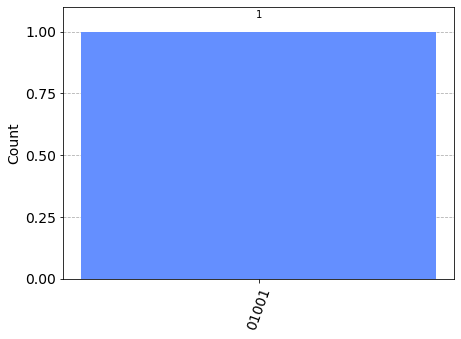

In [ ]:
#Simulate your circuit!
for i in range(n):
    qc.measure(i,i)
backend = Aer.get_backend('qasm_simulator')
counts= execute(qc,backend, shots=1).result().get_counts(qc)
print(counts)
plot_histogram(counts)

In [ ]:
bitstr = list(list(counts.keys())[0])
bitstr = bitstr[::-1]


print(bitstr)
print(hand)
bitstr_2 = ""
your_hand_val = compute_hand(hand, bitstr)
#find inverse to calculate player 2's card total
for i in range(len(bitstr)):
  if bitstr[i]=='1':
    bitstr_2+='0'
  elif bitstr[i]=='0':
    bitstr_2+='1'

your_hand_val_p2 = compute_hand(hand,bitstr_2)
dealer_hand_val = compute_dealer()
print("PLAYER 1:")
print("Your hand is", your_hand_val)
if players == 2: 
  print("PLAYER 2:")
  print("Your hand is", your_hand_val_p2)
if players ==1:
  if your_hand_val > 21:
    print('BUST! YOU LOSE!')
    print('---------GAME OVER---------')
  else:
    print(dealer_out)
    print('The dealer\'s hand is', dealer_hand_val)
    if dealer_hand_val > 21 or your_hand_val > dealer_hand_val:
      print('YOU WIN!!')
      print('---------GAME OVER---------')
    else:
      print('YOU LOSE!!')
      print('---------GAME OVER---------')
else:
  if your_hand_val > 21:
    print("PLAYER 1:")
    print('BUST! YOU LOSE!')
    your_hand_val = -1
  if your_hand_val_p2 > 21:
    print("PLAYER 2:")
    print('BUST! YOU LOSE!')
    your_hand_val = -1
  if your_hand_val_p2 == your_hand_val:
    print("TIE!")
  if your_hand_val_p2 > your_hand_val and your_hand_val_p2<=21:
    print("P2 WINS")
  if your_hand_val_p2 < your_hand_val and your_hand_val<=21:
    print("P1 WINS")



['1', '0', '0', '1', '0']
['10', 'k', '9', 'j', '3']

PLAYER 1:
Your hand is 20
("dealer's hand: ", ['q', '9'])
The dealer's hand is 19
YOU WIN!!
---------GAME OVER---------
